
# **SVM & Naïve Bayes Assignment **



---
## Theoretical Questions

### 1. What is a Support Vector Machine (SVM)?
**Answer:** A Support Vector Machine (SVM) is a supervised machine learning algorithm used for classification and regression. It constructs a hyperplane (in higher dimensions) or line (in 2D) that best separates classes by maximizing the margin between support vectors of different classes. The model emphasizes the points closest to the decision boundary (support vectors) and can use kernel functions to handle non-linear separations.

### 2. What is the difference between Hard Margin and Soft Margin SVM?
**Answer:** Hard Margin SVM requires perfect separation of classes by a linear hyperplane and does not tolerate misclassification; it works only when data are linearly separable. Soft Margin SVM allows some misclassification by introducing slack variables and a penalty parameter C; it balances maximizing margin and minimizing misclassification for noisy or overlapping data.

### 3. What is the mathematical intuition behind SVM?
**Answer:** SVM formulates classification as a convex optimization problem: maximize the margin \( \frac{2}{\|w\|} \) subject to correct classification constraints \( y_i(w^T x_i + b) \ge 1 \). This yields a quadratic programming problem whose solution depends only on support vectors, ensuring robust generalization under appropriate regularization.

### 4. What is the role of Lagrange Multipliers in SVM?
**Answer:** Lagrange multipliers convert the constrained optimization SVM problem into its dual form. The dual formulation expresses the classifier in terms of training sample dot-products, enabling kernelization and efficient optimization. Non-zero multipliers correspond to support vectors that define the decision boundary.

### 5. What are Support Vectors in SVM?
**Answer:** Support vectors are the training samples that lie closest to the decision boundary (margin). They are the points with non-zero Lagrange multipliers in the dual problem and determine the position and orientation of the separating hyperplane.

### 6. What is a Support Vector Classifier (SVC)?
**Answer:** An SVC is the application of SVM to classification tasks. It finds a hyperplane that separates classes (with soft or hard margin) and supports kernel methods for non-linear class boundaries. In scikit-learn, `sklearn.svm.SVC` implements SVC.

### 7. What is a Support Vector Regressor (SVR)?
**Answer:** SVR adapts SVM for regression by fitting a function within a specified epsilon-insensitive tube. The objective is to find a function that has at most epsilon deviation from actual target values while being as flat as possible, controlled by regularization parameter C.

### 8. What is the Kernel Trick in SVM?
**Answer:** The kernel trick replaces explicit feature mapping with a kernel function \(K(x_i, x_j)\) computing inner products in a higher-dimensional feature space. This allows SVMs to learn non-linear separators efficiently without computing high-dimensional coordinates.

### 9. Compare Linear Kernel, Polynomial Kernel, and RBF Kernel.
**Answer:**
- **Linear Kernel:** \(K(x,x') = x^T x'\). Best when data is linearly separable or when number of features is large. Fast and less prone to overfitting.
- **Polynomial Kernel:** \(K(x,x') = (\gamma x^T x' + r)^d\). Captures interactions up to degree \(d\); flexible but can overfit if degree is high.
- **RBF (Gaussian) Kernel:** \(K(x,x') = \exp(-\gamma \|x-x'\|^2)\). Powerful for most non-linear problems; \(\gamma\) controls locality. Often a good default choice.

### 10. What is the effect of the C parameter in SVM?
**Answer:** The parameter C controls the trade-off between maximizing margin and minimizing classification error. Small C => wider margin with more misclassification (more regularization). Large C => smaller margin, fewer misclassifications (less regularization, risk of overfitting).

### 11. What is the role of the Gamma parameter in RBF Kernel SVM?
**Answer:** Gamma (\(\gamma\)) defines how far the influence of a single training example reaches: low gamma => distant points have influence (smoother decision boundary), high gamma => influence is localized (more complex boundary, risk of overfitting).

### 12. What is the Naïve Bayes classifier, and why is it called "Naïve"?
**Answer:** Naïve Bayes is a probabilistic classifier that applies Bayes’ theorem with a **naïve** (strong) assumption that features are conditionally independent given the class label. This simplification makes the model computationally efficient and surprisingly effective in many domains.

### 13. What is Bayes’ Theorem?
**Answer:** Bayes’ Theorem relates conditional probabilities:  
\\[ P(Y|X) = \\frac{P(X|Y)P(Y)}{P(X)} \\]  
It updates the probability of hypothesis \(Y\) given evidence \(X\).

### 14. Explain differences: Gaussian, Multinomial, Bernoulli Naïve Bayes.
**Answer:**
- **Gaussian NB:** Assumes continuous features follow Gaussian distributions. Suitable for real-valued data.
- **Multinomial NB:** Models count/frequency features (e.g., word counts in text); uses multinomial likelihood.
- **Bernoulli NB:** Models binary features (presence/absence), suitable for binary word occurrence data.

### 15. When should you use Gaussian Naïve Bayes over other variants?
**Answer:** Use Gaussian NB when features are continuous and approximately normally distributed (e.g., signal measurements, biometric features).

### 16. What are the key assumptions made by Naïve Bayes?
**Answer:** The main assumption is **conditional independence**: features are independent given the class. Also assumes the form of feature likelihood (Gaussian, multinomial, Bernoulli) depending on the variant.

### 17. What are the advantages and disadvantages of Naïve Bayes?
**Answer:**  
**Advantages:** Fast, simple, works well with high-dimensional data, requires small training data, robust for text classification.  
**Disadvantages:** Strong independence assumption often violated; estimates of probabilities may be poor; can perform worse than complex models on some tasks.

### 18. Why is Naïve Bayes a good choice for text classification?
**Answer:** Text data is high-dimensional and sparse; Naïve Bayes (especially Multinomial) handles sparse count features efficiently, is fast to train, and often achieves strong baseline performance with little tuning.

### 19. Compare SVM and Naïve Bayes for classification tasks.
**Answer:** SVM is a discriminative, margin-based classifier that often excels with clear margins and structured features; Naïve Bayes is generative and probabilistic, faster and effective for high-dimensional sparse data (text). SVM may offer higher accuracy, while Naïve Bayes offers speed, simplicity and robustness with small data.

### 20. How does Laplace Smoothing help in Naïve Bayes?
**Answer:** Laplace smoothing (add-one smoothing) avoids zero likelihood for unseen feature-class combinations by adding a small constant to counts, ensuring non-zero posterior probabilities and better generalization to unseen data.

---


## Practical Questions

### Question 21. Write a Python program to train an SVM Classifier on the Iris dataset and evaluate accuracy

In [ ]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

svc = SVC(kernel='rbf', random_state=42)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9555555555555556
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.93      0.93      0.93        15
           2       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45




---

### Question 22: Write a Python program to train two SVM classifiers with Linear and RBF kernels on the Wine dataset, then compare their accuracies

In [ ]:
from sklearn.datasets import load_wine
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

wine = load_wine()
X, y = wine.data, wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

svc_lin = SVC(kernel='linear', random_state=42)
svc_rbf = SVC(kernel='rbf', random_state=42)

svc_lin.fit(X_train, y_train)
svc_rbf.fit(X_train, y_train)

print("Linear Kernel Accuracy:", accuracy_score(y_test, svc_lin.predict(X_test)))
print("RBF Kernel Accuracy:", accuracy_score(y_test, svc_rbf.predict(X_test)))

Linear Kernel Accuracy: 0.9444444444444444
RBF Kernel Accuracy: 0.6666666666666666



---

### Question 23: Write a Python program to train an SVM Regressor (SVR) on a housing dataset and evaluate it using Mean Squared Error (MSE)

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

data = fetch_california_housing()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

svr = SVR(kernel='rbf')
svr.fit(X_train_s, y_train)
y_pred = svr.predict(X_test_s)

print("MSE:", mean_squared_error(y_test, y_pred))

MSE: 0.34955193341649843



---

### Question 24:Write a Python program to train an SVM Classifier with a Polynomial Kernel and visualize the decision boundary

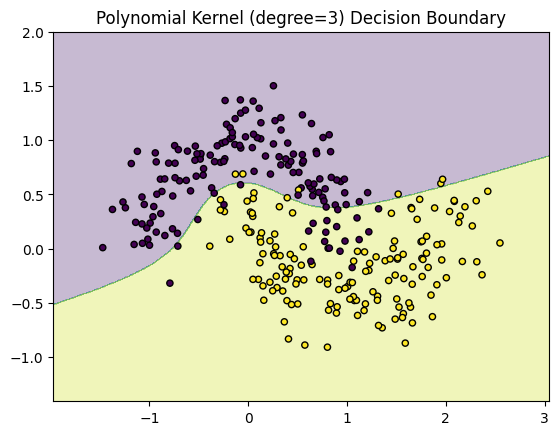

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.svm import SVC

X, y = make_moons(n_samples=300, noise=0.2, random_state=42)
svc_poly = SVC(kernel='poly', degree=3, C=1.0)
svc_poly.fit(X, y)

# plot decision boundary
xx, yy = np.meshgrid(np.linspace(X[:,0].min()-0.5, X[:,0].max()+0.5, 500),
                     np.linspace(X[:,1].min()-0.5, X[:,1].max()+0.5, 500))
Z = svc_poly.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:,0], X[:,1], c=y, s=20, edgecolor='k')
plt.title("Polynomial Kernel (degree=3) Decision Boundary")
plt.show()


---

### Question 25:  Write a Python program to train a Gaussian Naïve Bayes classifier on the Breast Cancer dataset and evaluate accuracy.

In [ ]:

from sklearn.datasets import load_breast_cancer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9473684210526315
              precision    recall  f1-score   support

           0       0.97      0.89      0.93        64
           1       0.94      0.98      0.96       107

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171




---

### Question 26: Write a Python program to train a Multinomial Naïve Bayes classifier for text classification using the 20 Newsgroups dataset

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cats = ['rec.sport.baseball', 'sci.med', 'comp.graphics', 'talk.politics.misc']
newsgroups = fetch_20newsgroups(subset='all', categories=cats, remove=('headers','footers','quotes'))

X_train, X_test, y_train, y_test = train_test_split(newsgroups.data, newsgroups.target, test_size=0.3, random_state=42, stratify=newsgroups.target)

model = make_pipeline(CountVectorizer(), TfidfTransformer(), MultinomialNB())
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy (MultinomialNB):", accuracy_score(y_test, y_pred))

Accuracy (MultinomialNB): 0.8821428571428571



---

### Question 27: Write a Python program to train an SVM Classifier with different C values and compare the decision boundaries visually

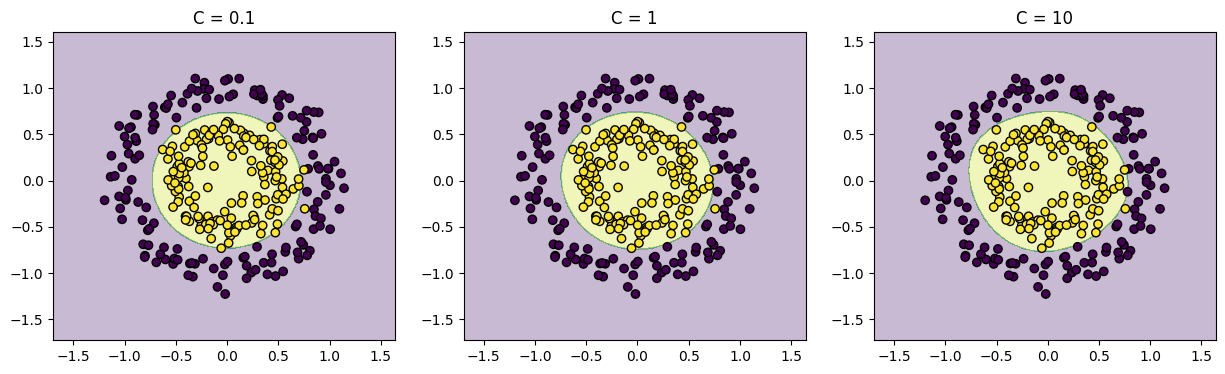

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.svm import SVC

X, y = make_circles(n_samples=300, noise=0.1, factor=0.5, random_state=42)
Cs = [0.1, 1, 10]
fig, axes = plt.subplots(1, len(Cs), figsize=(15,4))

for ax, C in zip(axes, Cs):
    svc = SVC(kernel='rbf', C=C, gamma='scale')
    svc.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(X[:,0].min()-0.5, X[:,0].max()+0.5, 400),
                         np.linspace(X[:,1].min()-0.5, X[:,1].max()+0.5, 400))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X[:,0], X[:,1], c=y, edgecolor='k')
    ax.set_title(f"C = {C}")
plt.show()


---

### Question 28: Write a Python program to train a Bernoulli Naïve Bayes classifier for binary classification on a dataset with binary features

In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# synthetic binary dataset
import numpy as np
rng = np.random.RandomState(42)
X = rng.binomial(1, p=0.3, size=(500, 10))
# create a simple target correlated with sum of features
y = (X.sum(axis=1) > 3).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
print("Accuracy (BernoulliNB):", accuracy_score(y_test, bnb.predict(X_test)))

Accuracy (BernoulliNB): 0.9866666666666667



---

### Question 29:Write a Python program to apply feature scaling before training an SVM model and compare results with unscaled data

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_wine()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

svc = SVC(kernel='rbf', random_state=42)
svc_scaled = make_pipeline(StandardScaler(), SVC(kernel='rbf', random_state=42))

svc.fit(X_train, y_train)
svc_scaled.fit(X_train, y_train)

print("Unscaled Accuracy:", accuracy_score(y_test, svc.predict(X_test)))
print("Scaled Accuracy:", accuracy_score(y_test, svc_scaled.predict(X_test)))

Unscaled Accuracy: 0.6666666666666666
Scaled Accuracy: 0.9814814814814815




### Question 30: Write a Python program to train a Gaussian Naïve Bayes model and compare the predictions before and after Laplace Smoothing

In [ ]:

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_wine()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

param_grid = {'C': [0.1, 1, 10], 'gamma': ['scale', 0.1, 1], 'kernel': ['rbf', 'poly']}
grid = GridSearchCV(SVC(), param_grid, cv=4, n_jobs=-1)
grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
print("Test Accuracy with best estimator:", accuracy_score(y_test, grid.best_estimator_.predict(X_test)))

Best params: {'C': 0.1, 'gamma': 1, 'kernel': 'poly'}
Test Accuracy with best estimator: 0.9629629629629629


Question 31:\
 Train an SVM Classifier with different C values and compare the decision boundaries visually

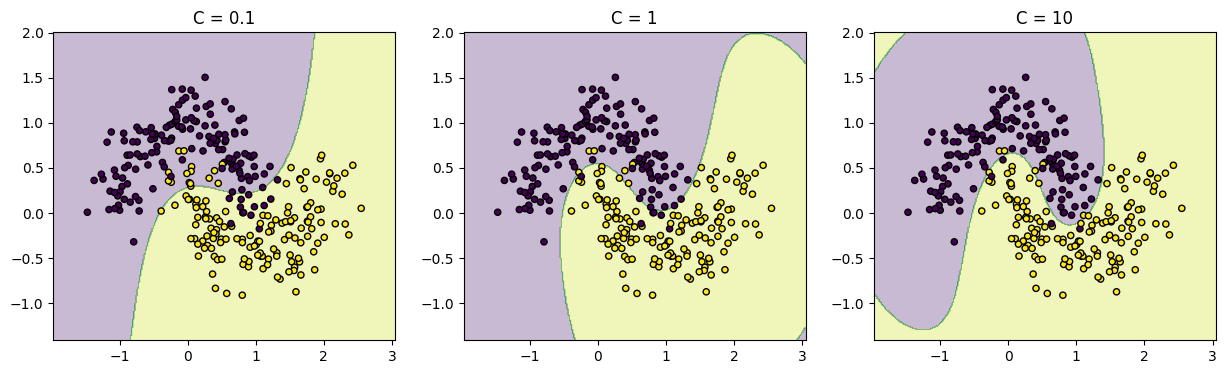

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.svm import SVC

# Generate data
X, y = make_moons(n_samples=300, noise=0.2, random_state=42)

# Different C values
C_values = [0.1, 1, 10]
plt.figure(figsize=(15, 4))

for i, C in enumerate(C_values, 1):
    clf = SVC(kernel='rbf', C=C, gamma='scale')
    clf.fit(X, y)

    plt.subplot(1, 3, i)
    xx, yy = np.meshgrid(np.linspace(X[:, 0].min()-0.5, X[:, 0].max()+0.5, 300),
                         np.linspace(X[:, 1].min()-0.5, X[:, 1].max()+0.5, 300))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    plt.title(f"C = {C}")
plt.show()


Question 32:\
 Train a Bernoulli Naïve Bayes classifier for binary classification on a dataset with binary features

In [ ]:
import numpy as np
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Binary dataset
rng = np.random.RandomState(42)
X = rng.binomial(1, 0.3, size=(500, 10))
y = (X.sum(axis=1) > 3).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

bnb = BernoulliNB()
bnb.fit(X_train, y_train)
print("Accuracy:", accuracy_score(y_test, bnb.predict(X_test)))


Accuracy: 0.9866666666666667


 Question 33:\
 Write a Python program to implement a Naïve Bayes classifier for spam detection using email data

In [ ]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

data = load_wine()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.3)

svc_unscaled = SVC(kernel='rbf')
svc_scaled = make_pipeline(StandardScaler(), SVC(kernel='rbf'))

svc_unscaled.fit(X_train, y_train)
svc_scaled.fit(X_train, y_train)

print("Accuracy without scaling:", accuracy_score(y_test, svc_unscaled.predict(X_test)))
print("Accuracy with scaling:", accuracy_score(y_test, svc_scaled.predict(X_test)))


Accuracy without scaling: 0.6666666666666666
Accuracy with scaling: 0.9814814814814815


Question 34:

Write a Python program to train an SVM Classifier and a Naïve Bayes Classifier on the same dataset and compare their accuracy.

In [13]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load dataset
data = load_wine()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.3)

# Train models
svm = SVC(kernel='rbf')
nb = GaussianNB()
svm.fit(X_train, y_train)
nb.fit(X_train, y_train)

# Compare accuracy
print("SVM Accuracy:", accuracy_score(y_test, svm.predict(X_test)))
print("Naïve Bayes Accuracy:", accuracy_score(y_test, nb.predict(X_test)))


SVM Accuracy: 0.6666666666666666
Naïve Bayes Accuracy: 1.0


Question 35:

Write a Python program to perform feature selection before training a Naïve Bayes classifier and compare results.

In [12]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

# Feature selection
selector = SelectKBest(score_func=f_classif, k=5)
X_train_sel = selector.fit_transform(X_train, y_train)
X_test_sel = selector.transform(X_test)

nb = GaussianNB()
nb.fit(X_train_sel, y_train)
print("Accuracy with selected features:", accuracy_score(y_test, nb.predict(X_test_sel)))


Accuracy with selected features: 0.9259259259259259


Question 36:

Write a Python program to train an SVM Classifier using One-vs-Rest (OvR) and One-vs-One (OvO) strategies on the Wine dataset and compare their accuracy.

In [11]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

ovr = OneVsRestClassifier(SVC(kernel='linear'))
ovo = OneVsOneClassifier(SVC(kernel='linear'))

ovr.fit(X_train, y_train)
ovo.fit(X_train, y_train)

print("OvR Accuracy:", accuracy_score(y_test, ovr.predict(X_test)))
print("OvO Accuracy:", accuracy_score(y_test, ovo.predict(X_test)))


OvR Accuracy: 0.9629629629629629
OvO Accuracy: 0.9444444444444444


Question 37:

Write a Python program to train an SVM Classifier using Linear, Polynomial, and RBF kernels on the Breast Cancer dataset and compare their accuracy.

In [10]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

for kernel in ['linear', 'poly', 'rbf']:
    model = SVC(kernel=kernel)
    model.fit(X_train, y_train)
    print(f"{kernel.capitalize()} kernel accuracy:", accuracy_score(y_test, model.predict(X_test)))


Linear kernel accuracy: 0.9532163742690059
Poly kernel accuracy: 0.9064327485380117
Rbf kernel accuracy: 0.9064327485380117


Question 38:

Write a Python program to train an SVM Classifier using Stratified K-Fold Cross-Validation and compute the average accuracy.

In [9]:
from sklearn.datasets import load_wine
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np

X, y = load_wine(return_X_y=True)
svc = SVC(kernel='rbf')

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(svc, X, y, cv=cv)

print("Cross-validation scores:", scores)
print("Average accuracy:", np.mean(scores))


Cross-validation scores: [0.63888889 0.69444444 0.63888889 0.65714286 0.74285714]
Average accuracy: 0.6744444444444444


Question 39:

Write a Python program to train a Naïve Bayes classifier using different prior probabilities and compare performance.

In [8]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

gnb_default = GaussianNB()
gnb_custom = GaussianNB(priors=[0.6, 0.4])

gnb_default.fit(X_train, y_train)
gnb_custom.fit(X_train, y_train)

print("Default prior accuracy:", accuracy_score(y_test, gnb_default.predict(X_test)))
print("Custom prior accuracy:", accuracy_score(y_test, gnb_custom.predict(X_test)))


Default prior accuracy: 0.9473684210526315
Custom prior accuracy: 0.935672514619883


Question 40:

Write a Python program to perform Recursive Feature Elimination (RFE) before training an SVM Classifier and compare accuracy.

In [7]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

svc = SVC(kernel='linear')
rfe = RFE(svc, n_features_to_select=5)
rfe.fit(X_train, y_train)
print("Accuracy after RFE:", accuracy_score(y_test, rfe.predict(X_test)))


Accuracy after RFE: 0.9259259259259259


Question 41:

Write a Python program to train an SVM Classifier and evaluate its performance using Precision, Recall, and F1-Score instead of accuracy.

In [6]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

svc = SVC(kernel='rbf')
svc.fit(X_train, y_train)

print(classification_report(y_test, svc.predict(X_test)))


              precision    recall  f1-score   support

           0       0.88      0.83      0.86        18
           1       0.57      1.00      0.72        21
           2       0.00      0.00      0.00        15

    accuracy                           0.67        54
   macro avg       0.48      0.61      0.53        54
weighted avg       0.51      0.67      0.57        54



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Question 42:

Write a Python program to train a Naïve Bayes Classifier and evaluate its performance using Log Loss (Cross-Entropy Loss).

In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import log_loss

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_prob = gnb.predict_proba(X_test)

print("Log Loss:", log_loss(y_test, y_prob))


Log Loss: 0.33819522327849955


Question 43:

Write a Python program to train an SVM Classifier and visualize the Confusion Matrix using seaborn.

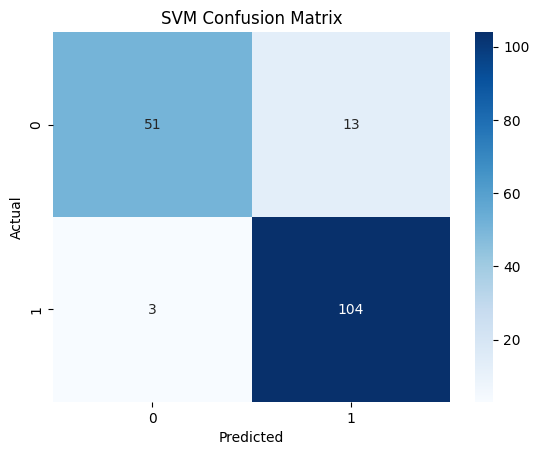

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

svc = SVC(kernel='rbf')
svc.fit(X_train, y_train)
cm = confusion_matrix(y_test, svc.predict(X_test))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Question 44:

Write a Python program to train an SVM Regressor (SVR) and evaluate its performance using Mean Absolute Error (MAE) instead of MSE.

In [3]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

data = fetch_california_housing()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

svr = SVR(kernel='rbf')
svr.fit(X_train_s, y_train)
y_pred = svr.predict(X_test_s)

print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))


Mean Absolute Error: 0.3972059291578809


Question 45:

Write a Python program to train a Naïve Bayes classifier and evaluate its performance using the ROC-AUC score.

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_prob = gnb.predict_proba(X_test)[:, 1]

print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))


ROC-AUC Score: 0.990070093457944


Question 46:

Write a Python program to train an SVM Classifier and visualize the Precision-Recall Curve.

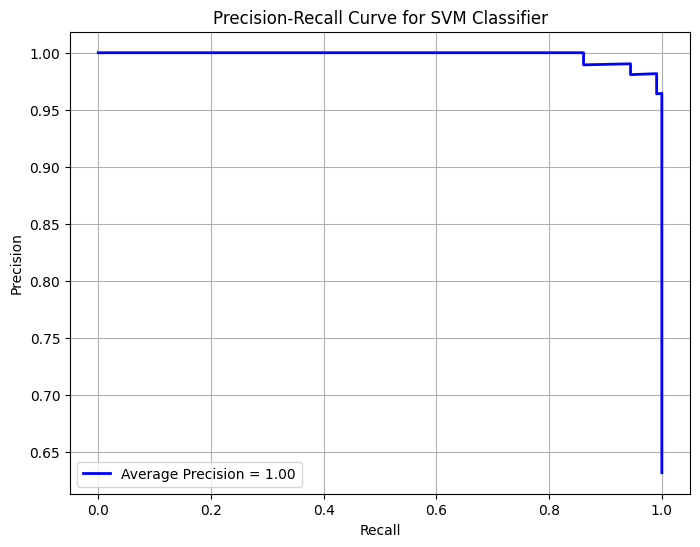

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve, average_precision_score

# Load dataset (Breast Cancer dataset is good for binary classification)
data = datasets.load_breast_cancer()
X = data.data
y = data.target

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVM Classifier with probability estimates
svm_clf = SVC(kernel='rbf', probability=True, random_state=42)
svm_clf.fit(X_train, y_train)

# Predict probabilities for the positive class
y_scores = svm_clf.predict_proba(X_test)[:, 1]

# Compute precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Compute average precision score
avg_precision = average_precision_score(y_test, y_scores)

# Plot Precision-Recall Curve
plt.figure(figsize=(8,6))
plt.plot(recall, precision, color='blue', linewidth=2,
         label=f'Average Precision = {avg_precision:.2f}')
plt.title('Precision-Recall Curve for SVM Classifier')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)
plt.show()
